# PyTorch 学習済みモデル(torchvison.models)を使って、画像分類(ImageNet 1000class)
https://pytorch.org/docs/stable/torchvision/models.html

In [1]:
import torch
import torch.nn.functional as F
import torchvision
from torchvision import datasets, models, transforms

In [2]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")
device

device(type='cuda', index=0)

## PyTorch Load Model
https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html#initialize-and-reshape-the-networks

In [4]:
def initialize_model(model_name, use_pretrained=True):
    model = None
    input_size = 0
    if model_name == "resnet":
        model = models.resnet18(pretrained=use_pretrained)
        input_size = 224
    elif model_name == "alexnet":
        model = models.alexnet(pretrained=use_pretrained)
        input_size = 224
    elif model_name == "vgg":
        model = models.vgg11_bn(pretrained=use_pretrained)
        input_size = 224
    elif model_name == "squeezenet":
        model = models.squeezenet1_0(pretrained=use_pretrained)
        input_size = 224
    elif model_name == "densenet":
        model = models.densenet121(pretrained=use_pretrained)
        input_size = 224
    elif model_name == "inception":
        model = models.inception_v3(pretrained=use_pretrained)
        input_size = 299
    else:
        print("Invalid model name, exiting...")
        exit()
    return model.to(device), input_size

## Load Model

In [5]:
# Models to choose from [resnet, alexnet, vgg, squeezenet, densenet, inception]
model_name = "inception"
# Load model
model, input_size = initialize_model(model_name, use_pretrained=True)
model.eval()

C:\Users\PXK13\AppData\Local\conda\conda\envs\all\lib\site-packages\torch\cuda\__init__.py:117: UserWarning: 
    Found GPU1 Quadro K2000 which is of cuda capability 3.0.
    PyTorch no longer supports this GPU because it is too old.
    
  warnings.warn(old_gpu_warn % (d, name, major, capability[1]))


Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

In [6]:
# Print the model we just instantiated
print(model)

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

)


In [7]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

data_transforms = transforms.Compose([
                    #transforms.Resize(input_size + 32),
                    transforms.Resize(input_size),
                    transforms.CenterCrop(input_size),
                    transforms.ToTensor(),
                    normalize
                    ])

img_transforms = transforms.Compose([
                    #transforms.Resize(input_size + 32),
                    transforms.Resize(input_size),
                    transforms.CenterCrop(input_size)
                    ])

In [8]:
img = Image.open('./image/elephant.jpg')
#img = Image.open('E:/Data/ffhq-dataset/images1024x1024/images1024x1024/00000.png')
img_tensor = data_transforms(img)
print(img_tensor.shape)

torch.Size([3, 299, 299])


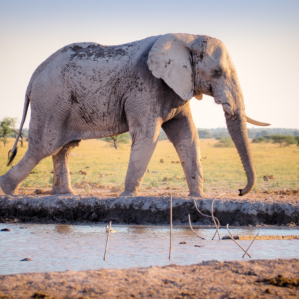

In [9]:
img_transforms(img)

In [10]:
img_tensor.unsqueeze_(0)
print(img_tensor.size())

torch.Size([1, 3, 299, 299])


## imagenet_class_index

In [11]:
class_index = json.load(open('imagenet_class_index.json', 'r'))
class_index

{'0': ['n01440764', 'tench'],
 '1': ['n01443537', 'goldfish'],
 '2': ['n01484850', 'great_white_shark'],
 '3': ['n01491361', 'tiger_shark'],
 '4': ['n01494475', 'hammerhead'],
 '5': ['n01496331', 'electric_ray'],
 '6': ['n01498041', 'stingray'],
 '7': ['n01514668', 'cock'],
 '8': ['n01514859', 'hen'],
 '9': ['n01518878', 'ostrich'],
 '10': ['n01530575', 'brambling'],
 '11': ['n01531178', 'goldfinch'],
 '12': ['n01532829', 'house_finch'],
 '13': ['n01534433', 'junco'],
 '14': ['n01537544', 'indigo_bunting'],
 '15': ['n01558993', 'robin'],
 '16': ['n01560419', 'bulbul'],
 '17': ['n01580077', 'jay'],
 '18': ['n01582220', 'magpie'],
 '19': ['n01592084', 'chickadee'],
 '20': ['n01601694', 'water_ouzel'],
 '21': ['n01608432', 'kite'],
 '22': ['n01614925', 'bald_eagle'],
 '23': ['n01616318', 'vulture'],
 '24': ['n01622779', 'great_grey_owl'],
 '25': ['n01629819', 'European_fire_salamander'],
 '26': ['n01630670', 'common_newt'],
 '27': ['n01631663', 'eft'],
 '28': ['n01632458', 'spotted_salama

In [12]:
labels = {int(key):value for (key, value) in class_index.items()}
print(labels[0])   # ['n01440764', 'tench']

['n01440764', 'tench']


## Predict

In [13]:
#out = F.softmax(model(torch.autograd.Variable(img_tensor)), dim=1).data.numpy().reshape(-1)    # for old version
out = F.softmax(model(img_tensor.to(device)), dim=1).cpu().data.numpy().reshape(-1)

## Top 10 Report

In [14]:
outarg = np.argsort(out)[::-1]
n = 10
for i in range(n):
    print('{:>2} {:>3} {} {:<18} {:>16.12%}'.format(i+1, outarg[i], labels[outarg[i]][0], labels[outarg[i]][1], out[outarg[i]]))

 1 101 n01871265 tusker             74.869823455811%
 2 386 n02504458 African_elephant   16.049581766129%
 3 385 n02504013 Indian_elephant     1.790142618120%
 4 695 n03874599 padlock             0.070500059519%
 5 296 n02134084 ice_bear            0.041129736928%
 6 340 n02391049 zebra               0.036774048931%
 7 507 n03075370 combination_lock    0.034218697692%
 8 352 n02422699 impala              0.027074044920%
 9 792 n04208210 shovel              0.024002634746%
10 842 n04371430 swimming_trunks     0.023785499798%


 1 452 n02869837 bonnet             72.098195552826%
 2 911 n04599235 wool                0.586896156892%
 3 457 n02883205 bow_tie             0.371574470773%
 4 903 n04584207 wig                 0.291339261457%
 5 433 n02807133 bathing_cap         0.288273696788%
 6 601 n03534580 hoopskirt           0.273219705559%
 7 824 n04325704 stole               0.249030697159%
 8 793 n04209133 shower_cap          0.246860040352%
 9 443 n02834397 bib                 0.238475366496%
10 518 n03127747 crash_helmet        0.233439356089%


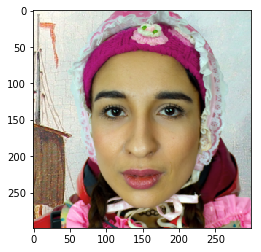

In [17]:
#img = Image.open('./image/elephant.jpg')
img = Image.open('E:/Data/ffhq-dataset/images1024x1024/images1024x1024/00004.png')
img_tensor = data_transforms(img)
#print(img_tensor.shape)
plt.imshow(img_transforms(img))
img_tensor.unsqueeze_(0)
#print(img_tensor.size())
#out = F.softmax(model(torch.autograd.Variable(img_tensor)), dim=1).data.numpy().reshape(-1)    # for old version
out = F.softmax(model(img_tensor.to(device)), dim=1).cpu().data.numpy().reshape(-1)
outarg = np.argsort(out)[::-1]
n = 10
for i in range(n):
    print('{:>2} {:>3} {} {:<18} {:>16.12%}'.format(i+1, outarg[i], labels[outarg[i]][0], labels[outarg[i]][1], out[outarg[i]]))

In [18]:
dataset = datasets.ImageFolder(root="E:/Data/ffhq-dataset/images1024x1024/",
                           transform=data_transforms)

dataloader = torch.utils.data.DataLoader(dataset, batch_size=1,
                                         shuffle=False)

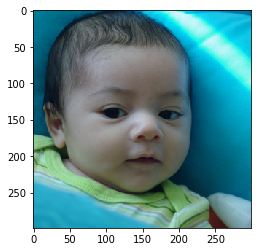

In [19]:
plt.imshow(np.transpose(torchvision.utils.make_grid(next(iter(dataloader))[0], normalize=True),(1,2,0)))

In [20]:
class_list = []
for i, data in enumerate(dataloader, 0):
    pred = F.softmax(model(data[0].to(device)), dim=1).cpu().data.numpy().reshape(-1)
    imagenet_class = np.argmax(pred, axis=0)
    #print('{:>5} {:>3} {} {:<18} {:>16.12%}'.format(i, imagenet_class, labels[imagenet_class][0], labels[imagenet_class][1], pred[imagenet_class]))
    class_list.append(imagenet_class)
    if i % 100 == 0:
        print(i)
#print(class_list)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [21]:
class_df = pd.DataFrame({'imagenet_class': class_list})

In [22]:
class_df

,imagenet_class
0,452
1,419
2,838
3,529
4,452
5,650
6,452
7,476
8,614
9,837


In [23]:
counts_df = class_df['imagenet_class'].value_counts()

In [24]:
counts_df

457    6191
903    5493
838    4915
929    3465
785    3453
834    3043
837    2648
667    2212
419    2111
445    1972
584    1628
452    1623
650    1469
652    1276
617    1274
678    1114
629    1084
823    1012
424     963
433     948
836     838
843     803
515     736
568     720
552     696
793     681
808     641
722     616
487     614
585     570
       ... 
996       1
330       1
915       1
869       1
649       1
521       1
102       1
329       1
806       1
103       1
267       1
546       1
798       1
226       1
159       1
525       1
639       1
77        1
799       1
863       1
288       1
416       1
672       1
33        1
225       1
289       1
545       1
779       1
162       1
767       1
Name: imagenet_class, Length: 540, dtype: int64

In [27]:
# Inception_v3
print(labels[457])
print(labels[903])
print(labels[838])
print(labels[929])
print(labels[785])

['n02883205', 'bow_tie']
['n04584207', 'wig']
['n04357314', 'sunscreen']
['n07615774', 'ice_lolly']
['n04162706', 'seat_belt']


In [25]:
# Vgg11_bn
print(labels[903])
print(labels[457])
print(labels[419])
print(labels[834])
print(labels[785])

['n04584207', 'wig']
['n02883205', 'bow_tie']
['n02786058', 'Band_Aid']
['n04350905', 'suit']
['n04162706', 'seat_belt']


In [26]:
class_df.to_csv("ffhq_imagenet_class.csv", sep=",")